In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../../data/processed/data.csv",
                   dtype = {
                            "expensa_id": "object",
                            "unidad_id": "object",
                            "propietario_id": "object",
                            "inquilino_id": "object",
                            "consorcio_id": "object",
                            "expensa_padre_id": "object",
                            "unidad_prop": "object",
                            "consorcio_id": "object",
                            "usuario_creador_id": "object",
                            "concepto_id": "object",
                            "mes": "object",
                            "anio": "object",
                            "unidad_denominacion":"object",
                            "consorcio_nombre": "object",
                            "version":"object",
                            "concepto_id": "object",
                            "unidad_tipo": "object",
                            "modo_pago": "object",
                            "forma_prorrateo": "object",
                            "tipo_prorrateo": "object",
                            "metodo_pago": "object",                       
                    },
                    parse_dates = ["fecha_vencimiento_1", "fecha_vencimiento_2"])
data.fecha_pago = pd.to_datetime(data.fecha_pago, errors="coerce")

In [8]:
data["fecha_expensa"] = data.anio + '-' + data.mes + '-01'
data.fecha_expensa = pd.to_datetime(data.fecha_expensa)
data["dias_para_pagar"] = (data.fecha_pago - data.fecha_expensa).dt.total_seconds() / (24 * 60 * 60)
data_unidad_34 = data.loc[data.unidad_id  == "34", ["fecha_expensa", "dias_para_pagar"]]
data_unidad_34 = data_unidad_34.iloc[2:-1,:]

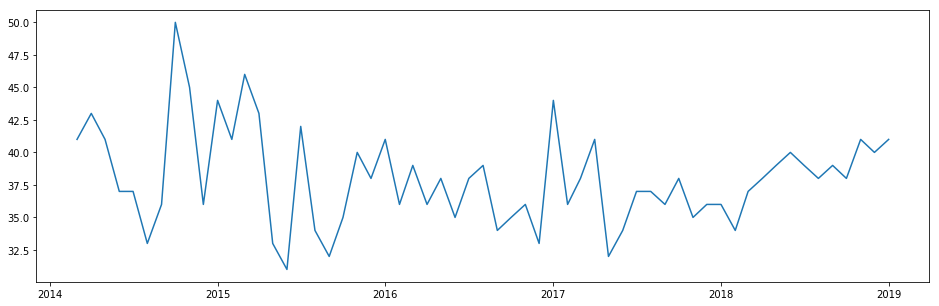

In [9]:
plt.figure(figsize=(16,5))
plt.plot(data_unidad_34.fecha_expensa, data_unidad_34.dias_para_pagar)

In [10]:
data_unidad_34 = data_unidad_34.set_index("fecha_expensa")

<Figure size 1152x648 with 0 Axes>

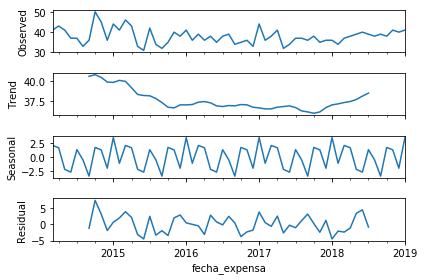

In [12]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data_unidad_34, model='additive')
fig = decomposition.plot()

plt.show()

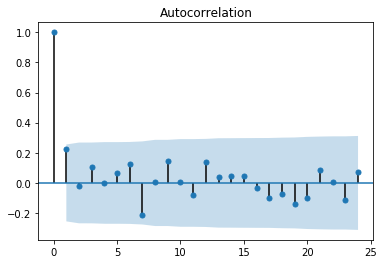

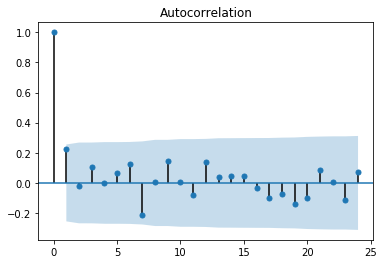

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_unidad_34.dias_para_pagar,lags=24)

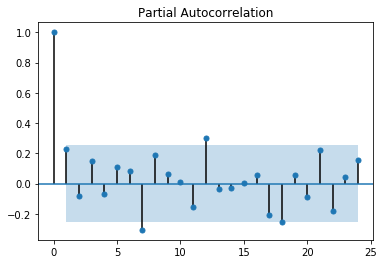

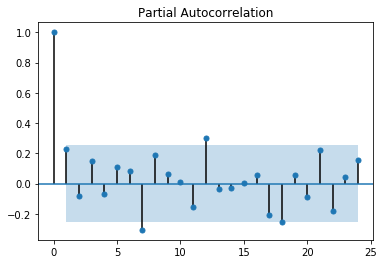

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_unidad_34.dias_para_pagar, lags=24)

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(endog=data_unidad_34, seasonal_order=(1,0,0,12))

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [23]:
fit_model = model.fit()

In [25]:
residuals = fit_model.resid
residuals

fecha_expensa
2014-03-01    41.000000
2014-04-01     2.290643
2014-05-01    -1.686552
2014-06-01    -3.712326
2014-07-01     0.237393
2014-08-01    -3.764228
2014-09-01     3.185134
2014-10-01    14.220210
2014-11-01    -4.609148
2014-12-01    -8.672127
2015-01-01     8.215094
2015-02-01    -2.687417
2015-03-01     5.273788
2015-04-01    -3.097864
2015-05-01    -9.149132
2015-06-01    -0.760356
2015-07-01    11.241206
2015-08-01    -6.650194
2015-09-01    -2.455264
2015-10-01    -0.200477
2015-11-01     6.484020
2015-12-01     0.540050
2016-01-01     1.346606
2016-02-01    -3.927098
2016-03-01     2.051383
2016-04-01    -1.954603
2016-05-01     4.748191
2016-06-01    -2.177059
2016-07-01     0.586677
2016-08-01     3.279340
2016-09-01    -4.168751
2016-10-01     0.547459
2016-11-01     0.056688
2016-12-01    -2.218176
2017-01-01    10.520094
2017-02-01    -6.392206
2017-03-01     1.558629
2017-04-01     4.053423
2017-05-01    -9.139403
2017-06-01     2.989965
2017-07-01     2.539291
20

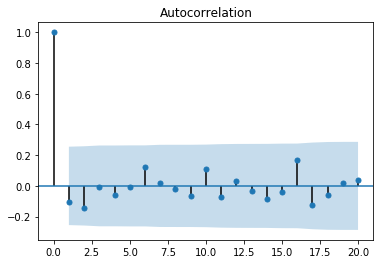

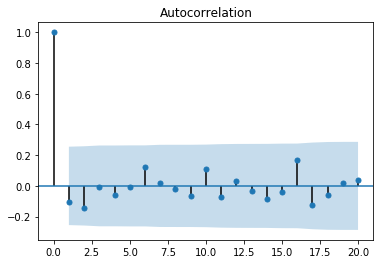

In [27]:
plot_acf(residuals, lags=20)

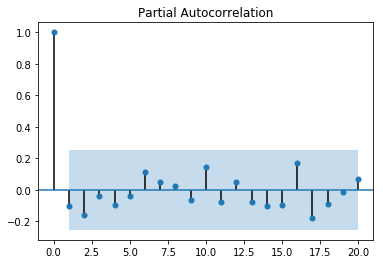

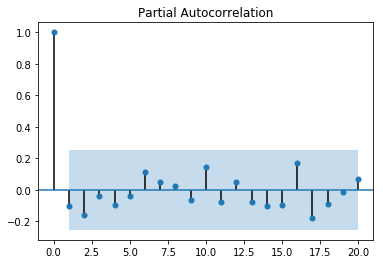

In [28]:
plot_pacf(residuals, lags=20)

In [49]:
feriados = [
    #2013
    '2013-01-01',
    '2013-01-31',
    '2013-02-11',
    '2013-02-12',
    '2013-02-20',
    '2013-03-28',
    '2013-03-29',
    '2013-04-01',
    '2013-04-02',
    '2013-05-01',
    '2013-06-20',
    '2013-06-21',
    '2013-07-09',
    '2013-08-19',
    '2013-10-14',
    '2013-11-25',
    '2013-12-25',
    #2014
    '2014-01-01',
    '2014-03-03',
    '2014-03-04',
    '2014-03-24',
    '2014-04-02',
    '2014-04-18',
    '2014-05-01',    
    '2014-05-02',
    '2014-06-20',
    '2014-07-09',
    '2014-08-18',
    '2014-10-13',
    '2014-11-24',
    '2014-12-25',    
    '2014-12-26',
    #2015
    '2015-01-01',
    '2015-02-16',
    '2015-02-17',
    '2015-03-23',
    '2015-03-24',
    '2015-04-02',
    '2015-04-03',
    '2015-05-01',    
    '2015-05-25',
    '2015-06-20',
    '2015-07-09',
    '2015-08-17',
    '2015-10-12',
    '2015-11-23',    
    '2015-12-07',   
    '2015-12-08',
    '2015-12-25',
    #2016
    '2016-01-01',
    '2016-02-08',
    '2016-02-09',
    '2016-03-24',
    '2016-03-25',
    '2016-04-02',
    '2016-05-01',
    '2016-05-25',
    '2016-06-20',
    '2016-07-08',
    '2016-07-09',
    '2016-08-15',
    '2016-10-12',
    '2016-11-28',
    '2016-12-08',
    '2016-12-09',
    '2016-12-25',
    #2017
    '2017-01-01',
    '2017-02-27',
    '2017-02-28',
    '2017-03-27',
    '2017-04-02',
    '2017-04-14',
    '2017-05-01',
    '2017-05-25',
    '2017-06-17',
    '2017-06-19',
    '2017-07-09',
    '2017-08-21',
    '2017-10-09',
    '2017-11-27',
    '2017-12-08',
    '2017-12-25',
    #2018
    '2018-01-01',
    '2018-02-12',
    '2018-02-13',
    '2018-03-24',
    '2018-03-30',
    '2018-04-02',
    '2018-05-01',
    '2018-05-25',
    '2018-06-20',
    '2018-07-09',
    '2018-08-20',
    '2018-10-15',
    '2018-11-19',
    '2018-12-08',
    '2018-12-25'    
]

In [62]:
data_u34 = data.loc[data.unidad_id  == "34", ["fecha_expensa", "fecha_vencimiento_1", "fecha_vencimiento_2", "dias_para_pagar"]]

In [63]:
data_u34["dias_venc_1"] = (data_u34.fecha_vencimiento_1 - data_u34.fecha_expensa).dt.total_seconds() / (24 * 60 * 60)
data_u34["dias_venc_2"] = (data_u34.fecha_vencimiento_2 - data_u34.fecha_expensa).dt.total_seconds() / (24 * 60 * 60)
data_u34["venc_1_dia"] = data_u34.fecha_vencimiento_1.dt.dayofweek
data_u34["venc_1_dom"] = data_u34.fecha_vencimiento_1.dt.dayofweek == 6
data_u34["venc_1_fer"] = data_u34.fecha_vencimiento_1.dt.date.map(lambda x: str(x) in feriados)
data_u34["venc_2_dia"] = data_u34.fecha_vencimiento_2.dt.dayofweek
data_u34["venc_2_dom"] = data_u34.fecha_vencimiento_2.dt.dayofweek == 6
data_u34["venc_2_fer"] = data_u34.fecha_vencimiento_2.dt.date.map(lambda x: str(x) in feriados)

In [64]:
data_u34 = data_u34.set_index("fecha_expensa")
data_u34 = data_u34.iloc[2:-1,:]

In [71]:
data_u34.shape

(59, 11)

In [91]:
exog = data_u34.iloc[:,3:].astype(float)
exog.columns

Index(['dias_venc_1', 'dias_venc_2', 'venc_1_dia', 'venc_1_dom', 'venc_1_fer',
       'venc_2_dia', 'venc_2_dom', 'venc_2_fer'],
      dtype='object')

In [146]:
model = SARIMAX(endog=data_u34.dias_para_pagar,
                exog = exog,
                order = (0,1,1),
                seasonal_order=(0,1,1,12),
               enforce_invertibility = False)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [147]:
fit_model = model.fit()

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


In [148]:
fit_model.params

dias_venc_1    1.201083e-01
dias_venc_2    1.201083e-01
venc_1_dia    -5.468203e-01
venc_1_dom     2.216956e+00
venc_1_fer     2.773049e-16
venc_2_dia    -6.994545e-01
venc_2_dom     2.258509e+00
venc_2_fer     2.758208e+00
ma.L1         -5.951389e-01
ma.S.L12       2.075640e+13
sigma2         3.813738e-13
dtype: float64

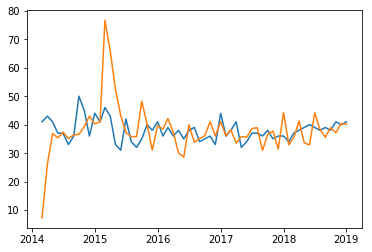

In [149]:
plt.plot(data_u34.dias_para_pagar)
plt.plot(fit_model.fittedvalues)